## **Group Members:**
Juhi Patel (jpp2464)<br>
Tanushree Balaji (tb33857)<br>
Aishwarya Rajeev (ar73945)<br>
Carlee Allen (cea2475)<br>
Snehal Naravane (sn27429)

### Task A

In [5]:
import nltk
import pandas as pd

comments = pd.read_csv('final data.csv')
text_file = comments['Comments']
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
term_freq_raw = pd.DataFrame(columns = ['word','count']) 

for i in range(len(text_file)):
    text = str(text_file[i])
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct = str(no_punct) + str(char)

    tokens = [t.lower() for t in no_punct.split()]
                
    counts = {}
    for words in tokens:
        if words in counts:
            counts[words] += 0
        else:
            counts[words] = 1

    counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
    if len(counts_df)>0:
        counts_df.columns = ['word','count']
        term_freq_raw = pd.concat([term_freq_raw, counts_df], ignore_index=True)

In [6]:
term_freq_raw_final = pd.DataFrame(term_freq_raw.groupby('word').sum())
term_freq_raw_final = term_freq_raw_final.sort_values(by='count',ascending=False).reset_index()
term_freq_raw_final.to_csv('term_freq_data.csv')
term_freq_raw_final.head(5)

,word,count
0,the,4304
1,a,3647
2,and,3513
3,to,3430
4,i,3275


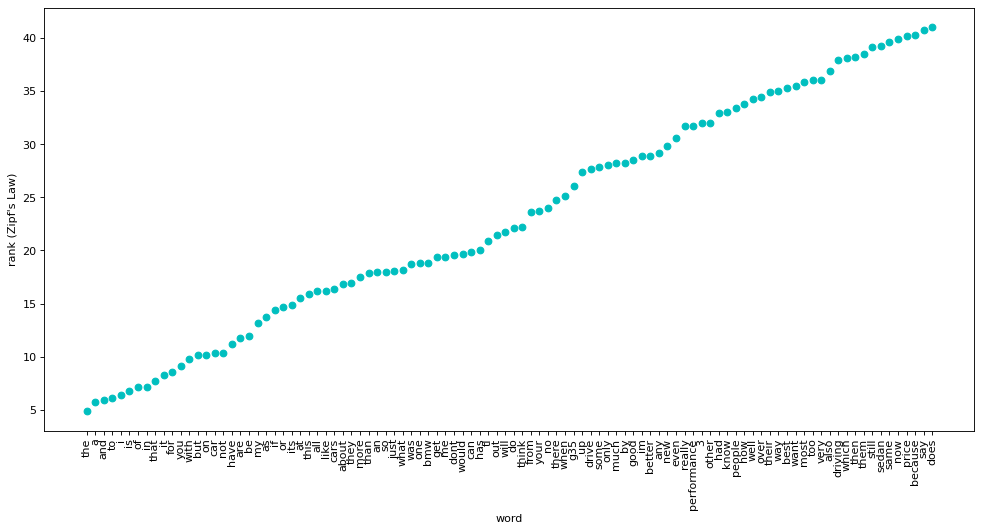

Text(0.5, 1.0, 'All Words')

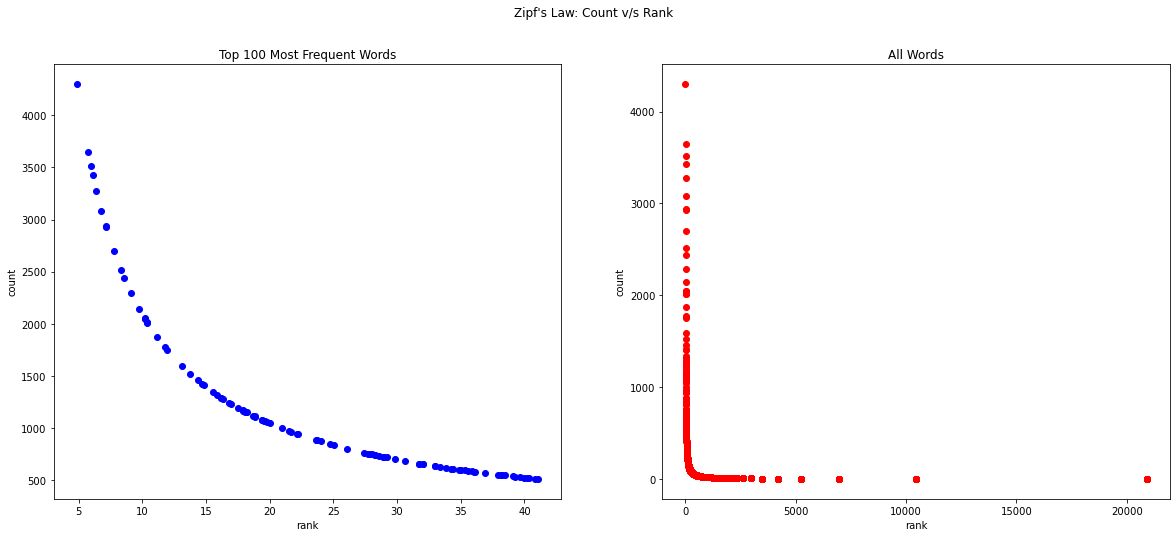

In [4]:
import pandas as pd
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


term_freq_df = pd.read_csv('term_freq_data.csv')

term_freq_sorted_df = term_freq_df.copy().sort_values('count', ascending = False)
term_freq_sorted_df = term_freq_sorted_df.reset_index()
term_freq_sorted_df = term_freq_sorted_df.drop(columns = 'index')

term_freq_sorted_df['rank'] = 0

rank_num = 0
for iter_rank in range(len(term_freq_sorted_df)):
    term_freq_sorted_df.loc[iter_rank, 'rank'] = iter_rank + 1

total_count = term_freq_sorted_df['count'].sum()

term_freq_sorted_df['rank * count'] = 0

for iter_rank in range(len(term_freq_sorted_df)):
    term_freq_sorted_df.loc[iter_rank, 'rank * count'] = term_freq_sorted_df.loc[iter_rank, 'count'] * term_freq_sorted_df.loc[iter_rank, 'rank']

num = len(term_freq_sorted_df)

const = term_freq_sorted_df.loc[(num - 1), 'rank'] * term_freq_sorted_df.loc[(num - 1), 'count']

term_freq_sorted_df['rank_z'] = 0

for iter_rank in range(len(term_freq_sorted_df)):
    term_freq_sorted_df.loc[iter_rank, 'rank_z'] = num * term_freq_sorted_df.loc[(num - 1), 'count'] / term_freq_sorted_df.loc[iter_rank, 'count']

term_freq_sorted_df['probability %'] = 0

for iter_rank in range(len(term_freq_sorted_df)):
    term_freq_sorted_df.loc[iter_rank, 'probability %'] = term_freq_sorted_df.loc[iter_rank, 'count'] * 100 / total_count

total_prob_perc = round(term_freq_sorted_df['probability %'].sum(), 2)

term_freq_top100_df = term_freq_sorted_df.copy().iloc[:100]




# Plot 1

figure(figsize=(15, 7), dpi=80)

plt.scatter(term_freq_top100_df['word'], term_freq_top100_df['rank_z'], c = 'c')
plt.xlabel('word')
plt.ylabel("rank (Zipf's Law)")
plt.xticks(rotation=90)

plt.show()



# Plot 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Zipf's Law: Count v/s Rank")

ax1.scatter(term_freq_top100_df['rank_z'], term_freq_top100_df['count'], c = 'b')
ax1.set_xlabel('rank')
ax1.set_ylabel('count')
ax1.set_title('Top 100 Most Frequent Words')

ax2.scatter(term_freq_sorted_df['rank_z'], term_freq_sorted_df['count'], c = 'r')
ax2.set_xlabel('rank')
ax2.set_ylabel('count')
ax2.set_title('All Words')




### TASK B

In [7]:
import nltk
import pandas as pd
from nltk.corpus import webtext
from nltk.probability import FreqDist
 
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     /Users/tanushreedevi/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [8]:
brand_rep = pd.read_csv("car models and brands (3).csv")
brand_rep.loc[len(brand_rep.index)] = ['infiniti', 'g35'] 
brand_rep.loc[len(brand_rep.index)] = ['bmw', '330i'] 
brand_rep = brand_rep.drop_duplicates()

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')

import pandas as pd
comments = pd.read_csv('final data.csv')
text_file = comments['Comments']
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

term_freq = pd.DataFrame(columns = ['word','count']) 

for i in range(len(text_file)):
    text = str(text_file[i])
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct = str(no_punct) + str(char)

    tokens = [t for t in no_punct.split()]
    filtered_sentence = [w.lower() for w in tokens if not w.lower() in stop_words]
    filtered_sentence_df = pd.DataFrame(filtered_sentence)
    if len(filtered_sentence_df)>0:
        filtered_sentence_df.columns = ['Model']
        filtered_sentence_final = filtered_sentence_df.merge(brand_rep,how='left',on='Model')
        filtered_sentence_final['word'] = filtered_sentence_final['Brand'].combine_first(filtered_sentence_final['Model'])
        filtered_sentence_final.drop(['Brand','Model'],axis=1,inplace=True)
        filtered_sentence_final_lst = list(filtered_sentence_final['word'])
                
    counts = {}
    for words in filtered_sentence_final_lst:
        if words in counts:
            counts[words] += 0
        else:
            counts[words] = 1

    counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
    if len(counts_df)>0:
        counts_df.columns = ['word','count']
        term_freq = pd.concat([term_freq, counts_df], ignore_index=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanushreedevi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
freq_nostop = pd.DataFrame(term_freq.groupby('word').sum())
freq_nostop = freq_nostop.sort_values(by='count',ascending=False).reset_index()
freq_nostop.head(10)

,word,count
0,car,2570
1,bmw,1543
2,like,1291
3,one,1110
4,get,1077
5,dont,1068
6,would,1064
7,tl,998
8,infiniti,995
9,think,942


In [12]:
freq_nostop.to_csv('term_freq_data_no_stopwords.csv')

In [13]:
brands = list(brand_rep["Brand"].unique())
check = freq_nostop[freq_nostop["word"].isin(brands)]
check = check[(check.word != "problem")&(check.word != "car")&(check.word != "sedan")&(check.word != "seat")]
brand_list = list(check.word.iloc[:10])
print(check[:10])
print("\nTop 10 Brands:")
print(brand_list)

           word  count
1           bmw   1543
8      infiniti    995
21        acura    651
38         audi    463
42       nissan    445
44        honda    431
63       subaru    357
77       toyota    325
143  volkswagen    229
228       dodge    166

Top 10 Brands:
['bmw', 'infiniti', 'acura', 'audi', 'nissan', 'honda', 'subaru', 'toyota', 'volkswagen', 'dodge']


### TASK C - This takes 15 minutes to run

In [80]:
def rem_punc(s):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in s:
        if char not in punctuations:
            no_punct = str(no_punct) + str(char)
    
    return no_punct

In [81]:
def tkn(no_punct):
    tokens = [t.lower() for t in no_punct.split()]
    filtered_sentence = [w.lower() for w in tokens if not w.lower() in stop_words]
    filtered_sentence_df = pd.DataFrame(filtered_sentence)
    filtered_sentence_final_lst = []
    if len(filtered_sentence_df)>0:
        filtered_sentence_df.columns = ['Model']
        filtered_sentence_final = filtered_sentence_df.merge(brand_rep,how='left',on='Model')
        filtered_sentence_final['word'] = filtered_sentence_final.Brand.combine_first(filtered_sentence_final.Model)
        filtered_sentence_final.drop(['Brand','Model'],axis=1,inplace=True)
        filtered_sentence_final_lst = list(filtered_sentence_final['word'])
        
    return filtered_sentence_final_lst

In [82]:
import numpy as np 

joint_prob_dict = {}
lift_dict = {}
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
lst = []

for m,k in enumerate(brand_list):
        samp_size = len(text_file)
        lst.append(k)
        for n,j in enumerate(brand_list):
            cnt=0
            if j!=k:
                for i in range(len(text_file)):
                    text = str(text_file[i])
                    no_punct = rem_punc(text)
                    filtered_sentence_final_lst = tkn(no_punct) 
                    
                    if k in  filtered_sentence_final_lst and j in  filtered_sentence_final_lst:
                        cnt = cnt + 1
                    else:
                        cnt = cnt + 0
        
                joint_prob_dict[(k,j)] = cnt
                cnt_k = int(freq_nostop.loc[freq_nostop['word']==k,'count'])
                cnt_j = int(freq_nostop.loc[freq_nostop['word']==j,'count'])
                lift_dict[(k,j)] = (joint_prob_dict[(k,j)]*samp_size)/(cnt_k * cnt_j)

In [96]:
lift_interim = pd.DataFrame.from_dict(lift_dict, orient='index').reset_index()
lift_interim.columns = ['combination','lift']
lift_interim.head()

,combination,lift
0,"(bmw, infiniti)",1.608822
1,"(bmw, acura)",1.343962
2,"(bmw, audi)",1.525737
3,"(bmw, nissan)",1.026746
4,"(bmw, honda)",1.255577


In [98]:
lift_interim[['brand_1','brand_2']] = pd.DataFrame(lift_interim['combination'].tolist(), index=lift_interim.index)
lift_final = lift_interim[['brand_1','brand_2','lift']].sort_values(by='brand_1',ascending=True)
lift_pvt = lift_final.pivot(index='brand_2', columns='brand_1', values='lift').fillna(0)
lift_pvt

brand_1,acura,audi,bmw,dodge,honda,infiniti,nissan,subaru,toyota,volkswagen
brand_2,,,,,,,,,,
acura,0.000000,2.620988,1.343962,1.064164,2.245341,1.844862,2.243739,2.215940,1.583363,2.817298
audi,2.620988,0.000000,1.525737,0.975826,1.302912,1.758251,2.256898,1.330986,1.196212,5.517463
bmw,1.343962,1.525737,0.000000,0.917474,1.255577,1.608822,1.026746,0.925840,1.435764,1.330137
dodge,1.064164,0.975826,0.917474,0.000000,1.537472,0.726524,7.987004,9.618305,0.648749,1.315305
honda,2.245341,1.302912,1.255577,1.537472,0.000000,1.399107,2.789437,1.137346,4.140639,1.823727
infiniti,1.844862,1.758251,1.608822,0.726524,1.399107,0.000000,1.513184,0.957167,1.267878,1.338571
nissan,2.243739,2.256898,1.026746,7.987004,2.789437,1.513184,0.000000,4.091524,2.523768,3.876159
subaru,2.215940,1.330986,0.925840,9.618305,1.137346,0.957167,4.091524,0.000000,1.034260,1.284357
toyota,1.583363,1.196212,1.435764,0.648749,4.140639,1.267878,2.523768,1.034260,0.000000,1.746725


In [117]:
lift_pvt.to_csv("Lift_Matrix.csv")

### Task D

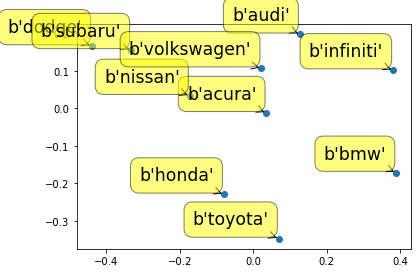

In [107]:
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from matplotlib.font_manager import FontProperties

df = pd.read_csv("Dis Matrix.csv", header=0, index_col=0)
size = df.shape
for j in range(size[1]):
    for i in range(size[0]):
        df.iloc[i,j] = df.iloc[j,i]

adist = np.array(df)
amax = np.max(adist)
adist /= amax
city = [r.encode('utf-8') for r in list(df.index)]

mds = manifold.MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 6)
results = mds.fit(adist)
coords = results.embedding_
plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')
font0 = FontProperties()
font = font0.copy()

font.set_size('xx-large')

for label, x, y in zip(city, coords[:,0], coords[:,1]):
    plt.annotate(
      label,
      xy = (x, y), xytext = (-10,10),
      fontproperties = font, 
      textcoords = 'offset points', ha='right', va = 'bottom',
      bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
      arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0'))

plt.savefig('mds.png')

### Task E

Based on the lift comparison matrix of car brands that was conducted, it can be seen that commonly denoted luxury car brands such as Audi and BMW are not as comparable in consumers' minds as companies would think. In fact, the brands that were most associated with the undoubtedly luxurious brand, BMW, were actually Nissan, Dodge, Honda, and Acura, with lift values all greater than that of Audi and BMW. In comparison, the lift values that were the highest in relation to Audi were Toyota, Dodge, and Honda, all with a higher lift value than BMW as well.<br><br>
This is interesting, because most consumers would probably think that car buyers associate the brands BMW and Audi more closely together since they are very popular in the luxurious car market due to the innovation and performance of their cars. However, the lift matrix displays that buyers are actually not psychologically grouping these brands together, and instead buyers are associating these "luxurious" brands with other companies that society wouldn't necessarily deem as luxury (in comparison to BMW & Audi) such as Acura, Nissan, and Dodge. Similar results can be seen in the multi-dimensional scaling map, as there is a gap present between these two highly denoted luxury car brands. On the map, Audi is more spatially related to companies such as Infiniti and Volkswagen, and BMW is isolated from a majority of the brands.<br><br>
This reveals that consumers again are not associating the two brands together, which could represent a market segmentation between the two highly popular luxury car companies. The introduction of a new luxurious entry-level car could help to bridge the gap that is apparent in consumers' minds when purchasing a performance luxury car. By creating a brand with characteristics in the middle of the two brands, such as the styling and technology present with Audi cars and the reliability and driving experience of BMW, the company could capitalize on this market segmentation. With this new brand, consumers looking for a middle ground would be satisfied with the "best of both worlds," and the model could pull loyal consumers from either Audi/BMW that are curious to switch. Additionally, focusing on cutting costs could allow this company to lower prices or make other widely available entry-level models that would appeal to consumers of Nissan, Acura, and Infiniti, since they were also highly associated with these luxurious brands as well.

### Task F

Frequency Table:

Brand  | Attribute | Count
-------------------|------------------|------------------
bmw       | performance | 260
bmw       | sedan | 244
bmw       | luxury | 172
bmw       | engine | 208
bmw       | handling | 172
audi       | performance | 74
audi       | sedan | 77
audi       | luxury | 58
audi       | engine | 75
audi       | handling | 40
acura       | performance | 105
acura       | sedan | 122
acura       | luxury | 100
acura       | engine | 84
acura       | handling | 172
infiniti       | performance | 82
infiniti       | sedan | 93
infiniti       | luxury | 65
infiniti       | engine | 61
infiniti       | handling | 35
nissan       | performance | 57
nissan       | sedan | 55
nissan       | luxury | 39
nissan       | engine | 63
nissan       | handling | 23


The five most frequently mentioned attributes of cars in the discussion were:

* performance
* sedan
* luxury
* engine
* handling

<br>The top brands that were most frequently mentioned in the discussion were BMW, Audi, Acura, Infiniti, and Nissan.

As seen in the frequency table, BMW's most mentioned attributes were overall their driving performance and then their sedan body-type. All the other brands had less of the frequently mentioned attributes relative to BMW, but most notably mentioned was Acura's performance of their vehicles as well as their popular sedan body-type. 
<br><br>
Audi had relatively low mentions of their handling and luxury of their vehicles, which is surprising and likely contradictory to their intended brand reputation. Infiniti also had a low frequency of mentions related to their handling, but relatively high mentions of the performance of their cars. Nissan had the lowest number of popular attribute mentions in total, with lower frequency mentions in overall driving experience, handling, and performance of their vehicles. Overall, BMW had the largest number of frequently mentioned attributes in comparison to the other top mentioned brands by a large margin, demonstrating that consumers are connecting BMW with the attributes that they are looking for most in a vehicle.

### Task G

After analyzing the frequency counts of attributes that consumers are speaking about in the forum, we can make the deduction that the top attributes mentioned are characteristics that consumers are valuing when deciding whether to purchase a particular luxury vehicle. BMW is largely ahead of all other top mentioned brands in these categories of performance, sedan, luxury, engine, and handling. In terms of frequency mentions of attributes, Acura is the only other car brand that is remotely close to receiving attribute mentions that consumers view as desirable. While it would be most beneficial for a new company to produce an entry-level model that has exceptional aspects in all of these categories (performance, sedan, luxury, engine, and handling), it is not feasible. 
<br><br>
Since BMW has such a distinguished reputation in the performance and engine market especially, a new company should aim to focus on optimizing the attributes that were not mentioned as much in relation to BMW and the other brands. Across the brands, luxury and handling were characteristics that were not mentioned as much as the other aspects, which could highlight a greater need for a car with these specifics. With a stronger focus on these attributes, the vehicle could better satisfy customers that were looking for stronger peformance in these specific areas. By creating an entry-level model with these special attention to these attributes, the company can effectively carve an area in the market that separates them from other luxury car competitors, while also creating a unique value proposition for its competitors to ensure sustainable growth.

### Task H - This runs in 10 min

In [1]:
def rem_punc(s):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in s:
        if char not in punctuations:
            no_punct = str(no_punct) + str(char)
    
    return no_punct

In [2]:
def tkn(no_punct):
    tokens = [t.lower() for t in no_punct.split()]
    filtered_sentence = [w.lower() for w in tokens if not w.lower() in stop_words]
    filtered_sentence_df = pd.DataFrame(filtered_sentence)
    filtered_sentence_final_lst = []
    if len(filtered_sentence_df)>0:
        filtered_sentence_df.columns = ['Model']
        filtered_sentence_final = filtered_sentence_df.merge(brand_rep,how='left',on='Model')
        filtered_sentence_final['word'] = filtered_sentence_final.Brand.combine_first(filtered_sentence_final.Model)
        filtered_sentence_final.drop(['Brand','Model'],axis=1,inplace=True)
        filtered_sentence_final_lst = list(filtered_sentence_final['word'])
        
    return filtered_sentence_final_lst

In [14]:
import numpy as np 

joint_prob_dict = {}
lift_dict = {}
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
lst = []
aspirational_words = ['aspire','dream','hope','wish']

for m,k in enumerate(aspirational_words):
        samp_size = len(text_file)
        lst.append(k)
        for n,j in enumerate(brand_list):
            cnt=0
            if j!=k:
                for i in range(len(text_file)):
                    text = str(text_file[i])
                    no_punct = rem_punc(text)
                    filtered_sentence_final_lst = tkn(no_punct) 
                    
                    if k in  filtered_sentence_final_lst and j in  filtered_sentence_final_lst:
                        cnt = cnt + 1
                    else:
                        cnt = cnt + 0
        
                joint_prob_dict[(k,j)] = cnt
                cnt_k = int(freq_nostop.loc[freq_nostop['word']==k,'count'])
                cnt_j = int(freq_nostop.loc[freq_nostop['word']==j,'count'])
                lift_dict[(k,j)] = (joint_prob_dict[(k,j)]*samp_size)/(cnt_k * cnt_j)

In [18]:
lift_interim_aspire = pd.DataFrame.from_dict(lift_dict, orient='index').reset_index()
lift_interim_aspire.columns = ['combination','lift']
lift_interim_aspire[['attribute','brand_2']] = pd.DataFrame(lift_interim_aspire['combination'].tolist(), index=lift_interim_aspire.index)
lift_final_aspire = lift_interim_aspire[['attribute','brand_2','lift']].sort_values(by='attribute',ascending=True)
lift_pvt_aspire = lift_final_aspire.pivot(index='brand_2', columns='attribute', values='lift')
lift_pvt_aspire['Average Lift'] = lift_pvt_aspire.mean(axis=1)
lift_pvt_aspire

attribute,aspire,dream,hope,wish,Average Lift
brand_2,,,,,
acura,1.920123,1.355381,1.371516,1.760113,1.601783
audi,0.000000,1.905730,1.060629,1.124910,1.022817
bmw,2.025275,1.524913,1.070503,1.282674,1.475841
dodge,3.765060,0.000000,0.806799,0.627510,1.299842
honda,1.450116,0.000000,1.450116,1.208430,1.027166
infiniti,1.884422,0.886787,1.615219,1.989112,1.593885
nissan,1.404494,0.000000,1.103531,0.936330,0.861089
subaru,3.501401,0.823859,0.625250,1.167134,1.529411
toyota,1.923077,1.809955,1.373626,2.243590,1.837562


For our specific analysis, we are associating "aspirational" with terms such as 'aspire','dream','hope' and 'wish'. In order to better understand customer's aspirations, we iterated through the reviews within each car brand to count how many times aspirational words such as "hope", "aspire", "dream", or "wish" were used in connection with a particular brand. The objective is to understand how often our top brands are co-mentioned with these 'aspirational' terms through the use of lift analysis. 

Since  "hope", "aspire", "dream", and "wish" are all words that consumers tend to utilize when they are dreaming of owning a particular vehicle, we can interpret these higher values as cars that conusumers believe are the most aspirational to attain. 

We found the brand lifts associated with each word and averaged it out to identify relevant brands. Overall, the most aspirational brand that we found across all of the words was Toyota, with Acura, Infiniti, and Subaru closely behind. Overall, Toyota is on top with an average lift of 1.84. The popular sentiment is that Toyota has built a luxury brand from scratch, with rich interiors and quality paralleling those of high-end brands.

Toyota can capitalize on this reputation in 2 main ways: 
1. Ads targeting consumers of elite vehicles and using key "luxury" terms in their campaigns could potentially boost their sales
2. They also have the liberty to price some of their top-end models higher while still being more affordable than their competition. This gives them the scope to promote themselves as the best priced luxury car in this specific segment



Other values that stood out was the lift calculation for Dodge with the word "aspire" mentioned frequently in association with the brand. Through this analysis, it is surprising to see that consumers don't even necessarily associate Audi or BMW as an aspirational brand in comparison to the other brands. Even though BMW had a relatively high lift value for the term "aspire," the rest of the lift values for both BMW and Audi were lower than many of the lift values from other brands that wouldn't be considered the same level of luxury. 

This reinforces the fact that higher price does not necessarily cause consumers to automatically assume luxury, and thus aspiration. Out of the vehicles analyzed, Audi and BMW are by a large margin more expensive in comparison to the other brands. However, the aspirational lift values of the other brands were just as high, if not higher than some of the brands that are deemed the "most luxurious" to own in our society today. This leads us to believe that maybe Americans do not care as much about the status of certain foreign car brands as we would think, and maybe most people are just as aspired to own a vehicle that is practical and doesn't "break the bank." 

If a company can bundle all of these feelings into an entry level model that offers the balance of luxury with affordability, and performance with safety/reliability, there will be an new competitor for both the isolated luxury markets focused on performance and status (such as BMW), as well as the higher-end family cars that are reliable (like with the Acuras and Infinitis). 
